In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

In [2]:
# Load the weather dataset

weather = pd.read_csv(r"D:\00 Datasets\Others\Data-06\weather.csv", header=0)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
# Display the dataset information

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
# Identify the missing data 

weather.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

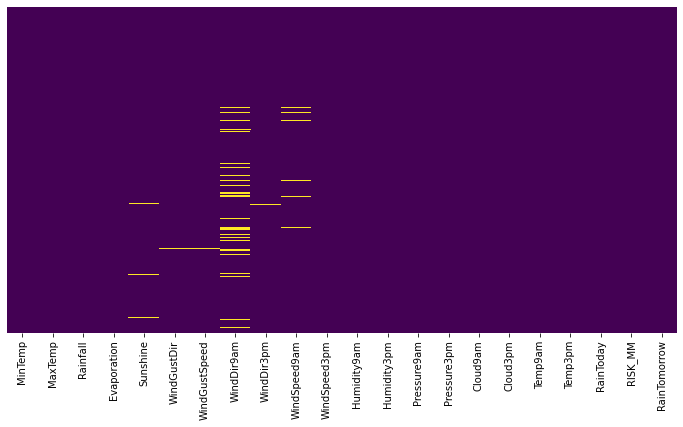

In [6]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                         copy=True, add_indicator=False)

weather['Sunshine'] = imputer_int.fit_transform(weather[['Sunshine']])

In [8]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

weather['WindGustDir'] = imputer_str.fit_transform(weather[['WindGustDir']])
weather['WindGustSpeed'] = imputer_int.fit_transform(weather[['WindGustSpeed']])
weather['WindDir9am'] = imputer_str.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = imputer_str.fit_transform(weather[['WindDir3pm']])
weather['WindSpeed9am'] = imputer_int.fit_transform(weather[['WindSpeed9am']])

<AxesSubplot:>

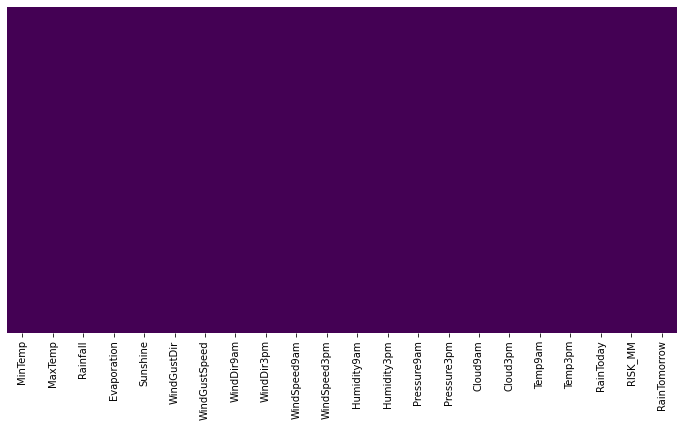

In [9]:
# Check the Visualize of missing data in graph

resizeplot()
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Drop the RISK_MM variable

weather.drop('RISK_MM', inplace=True,axis=1)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


In [11]:
# "groupby" we have important information about the possible conditions that may or may not cause rain condition

weather[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
         'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
         'Temp3pm']].groupby(weather['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [12]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

weather['WindGustDir'] = LB.fit_transform(weather[['WindGustDir']])
weather['WindDir9am'] = LB.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = LB.fit_transform(weather[['WindDir3pm']])

In [13]:
# Use LabelEncoder for target variables

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

weather['RainToday'] = LE.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = LE.fit_transform(weather['RainTomorrow'])

In [14]:
weather.head().T

,0,1,2,3,4
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,0.0,0.0,0.0,0.0,0.0
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,0.0,1.0,0.0,0.0,0.0
WindDir3pm,0.0,0.0,0.0,0.0,0.0
WindSpeed9am,6.0,4.0,6.0,30.0,20.0


In [15]:
# Identify the dependent and Target variables

IndepVar = []
for col in weather.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)

TargetVar = 'RainTomorrow'

x = weather[IndepVar]
y = weather[TargetVar]

In [16]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# SVC Algorithm - Gaussian Kernel

[[87  5]
 [10  8]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        92
           1       0.62      0.44      0.52        18

    accuracy                           0.86       110
   macro avg       0.76      0.70      0.72       110
weighted avg       0.85      0.86      0.85       110

Accuracy: 86.36 %
Precision: 86.36 %
Recall: 86.36 %
f1-score: 86.36 %
roc_auc_score: 0.695


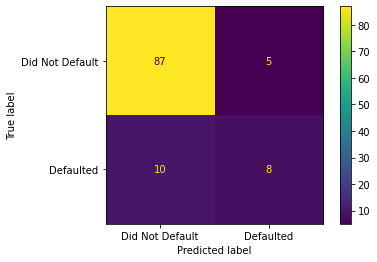

In [18]:
# Training the SVM algorithm 

from sklearn.svm import SVC

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelSVMGaussian.fit(x_train, y_train)

# Predicting the values

y1_pred = modelSVMGaussian.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y1_pred))
print(classification_report(y_test,y1_pred))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelSVMGaussian, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [19]:
# Results - predict vs actual values

Results1 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y1_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal1 = x_test_F1.merge(Results1, left_index=True, right_index=True)
ResultsFinal1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
193,9.4,19.2,0.0,2.2,7.7,0,24.0,1,0,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,0,0,0
33,13.3,26.5,6.6,3.8,11.8,0,50.0,0,0,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,1,0,1
15,12.4,32.1,0.0,8.4,11.1,1,46.0,0,0,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,0,0,0
310,6.3,16.1,0.0,1.8,2.9,0,35.0,0,0,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,0,0,0
57,15.1,28.3,14.4,8.8,13.2,0,28.0,0,0,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,1,0,0


# Random Forest Algorithm

[[88  4]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        92
           1       0.69      0.50      0.58        18

    accuracy                           0.88       110
   macro avg       0.80      0.73      0.76       110
weighted avg       0.87      0.88      0.87       110

Accuracy: 88.18 %
Precision: 88.18 %
Recall: 88.18 %
f1-score: 88.18 %
roc_auc_score: 0.728


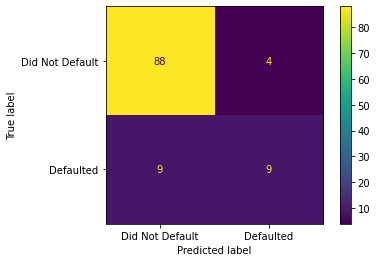

In [20]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                 criterion='entropy', max_depth=None, max_features='auto',
                                 max_leaf_nodes=None, max_samples=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                 warm_start=False)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with test data set

y2_pred = modelRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y2_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelRF, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [21]:
# Results - predict vs actual values

Results2 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y2_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal2 = x_test_F1.merge(Results2, left_index=True, right_index=True)
ResultsFinal2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
193,9.4,19.2,0.0,2.2,7.7,0,24.0,1,0,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,0,0,0
33,13.3,26.5,6.6,3.8,11.8,0,50.0,0,0,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,1,0,0
15,12.4,32.1,0.0,8.4,11.1,1,46.0,0,0,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,0,0,0
310,6.3,16.1,0.0,1.8,2.9,0,35.0,0,0,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,0,0,0
57,15.1,28.3,14.4,8.8,13.2,0,28.0,0,0,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,1,0,0


# Decision Tree Algorithm

[[73 19]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        92
           1       0.32      0.50      0.39        18

    accuracy                           0.75       110
   macro avg       0.61      0.65      0.62       110
weighted avg       0.80      0.75      0.77       110

Accuracy: 74.55 %
Precision: 32.14 %
Recall: 50.0 %
f1-score: 39.13 %
roc_auc_score: 0.647


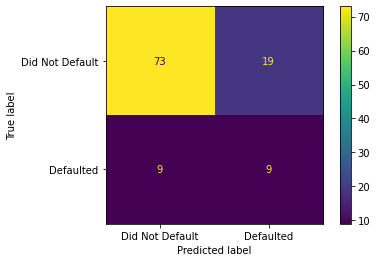

In [22]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                 max_depth=None, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y3_pred = modelDT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelDT, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [23]:
# Results - predict vs actual values

Results3 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y3_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal3 = x_test_F1.merge(Results3, left_index=True, right_index=True)
ResultsFinal3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
193,9.4,19.2,0.0,2.2,7.7,0,24.0,1,0,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,0,0,0
33,13.3,26.5,6.6,3.8,11.8,0,50.0,0,0,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,1,0,0
15,12.4,32.1,0.0,8.4,11.1,1,46.0,0,0,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,0,0,0
310,6.3,16.1,0.0,1.8,2.9,0,35.0,0,0,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,0,0,0
57,15.1,28.3,14.4,8.8,13.2,0,28.0,0,0,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,1,0,1


# Logistic Regression Algorithm

[[87  5]
 [ 7 11]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        92
           1       0.69      0.61      0.65        18

    accuracy                           0.89       110
   macro avg       0.81      0.78      0.79       110
weighted avg       0.89      0.89      0.89       110

Accuracy: 89.09 %
Precision: 89.09 %
Recall: 89.09 %
f1-score: 89.09 %
roc_auc_score: 0.778


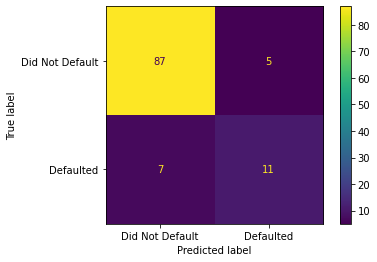

In [24]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y4_pred = modelLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y4_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y4_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelLR, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [25]:
# Results - predict vs actual values

Results4 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y4_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal4 = x_test_F1.merge(Results4, left_index=True, right_index=True)
ResultsFinal4.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
193,9.4,19.2,0.0,2.2,7.7,0,24.0,1,0,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,0,0,0
33,13.3,26.5,6.6,3.8,11.8,0,50.0,0,0,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,1,0,0
15,12.4,32.1,0.0,8.4,11.1,1,46.0,0,0,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,0,0,0
310,6.3,16.1,0.0,1.8,2.9,0,35.0,0,0,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,0,0,0
57,15.1,28.3,14.4,8.8,13.2,0,28.0,0,0,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,1,0,0


# KNN Algorithm

[[87  5]
 [12  6]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        92
           1       0.55      0.33      0.41        18

    accuracy                           0.85       110
   macro avg       0.71      0.64      0.66       110
weighted avg       0.82      0.85      0.83       110

Accuracy: 84.55 %
Precision: 84.55 %
Recall: 84.55 %
f1-score: 84.55 %
roc_auc_score: 0.639


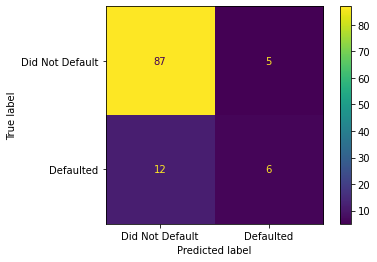

In [26]:
# To build the 'KNN' model 

from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelKNN = modelKNN.fit(x_train, y_train)

# Predict the model with test data set

y5_pred = modelKNN.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y5_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y5_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y5_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y5_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelKNN, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [27]:
# Results - predict vs actual values

Results5 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y5_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal5 = x_test_F1.merge(Results5, left_index=True, right_index=True)
ResultsFinal5.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
193,9.4,19.2,0.0,2.2,7.7,0,24.0,1,0,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,0,0,0
33,13.3,26.5,6.6,3.8,11.8,0,50.0,0,0,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,1,0,1
15,12.4,32.1,0.0,8.4,11.1,1,46.0,0,0,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,0,0,0
310,6.3,16.1,0.0,1.8,2.9,0,35.0,0,0,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,0,0,0
57,15.1,28.3,14.4,8.8,13.2,0,28.0,0,0,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,1,0,0


# Gradient Boosting Algorithm

[[84  8]
 [ 8 10]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        92
           1       0.56      0.56      0.56        18

    accuracy                           0.85       110
   macro avg       0.73      0.73      0.73       110
weighted avg       0.85      0.85      0.85       110

Accuracy: 85.45 %
Precision: 85.45 %
Recall: 85.45 %
f1-score: 85.45 %
roc_auc_score: 0.734


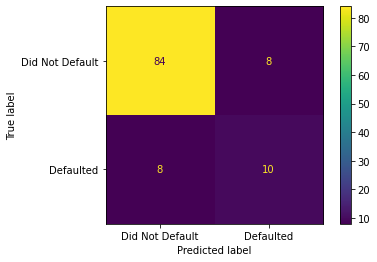

In [28]:
# To build the 'Gradient Boosting' model

from sklearn.ensemble import GradientBoostingClassifier

modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                      subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                      min_impurity_decrease=0.0, min_impurity_split=None, init=None,
                                      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                      warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
                                      tol=0.0001, ccp_alpha=0.0)

modelXGB = modelXGB.fit(x_train,y_train)

# Predict the model with test data set

y6_pred = modelXGB.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y6_pred))
print(classification_report(y_test, y6_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y6_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y6_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y6_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y6_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelXGB, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [29]:
# Results - predict vs actual values

Results6 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y6_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal6 = x_test_F1.merge(Results6, left_index=True, right_index=True)
ResultsFinal6.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
193,9.4,19.2,0.0,2.2,7.7,0,24.0,1,0,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,0,0,0
33,13.3,26.5,6.6,3.8,11.8,0,50.0,0,0,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,1,0,0
15,12.4,32.1,0.0,8.4,11.1,1,46.0,0,0,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,0,0,0
310,6.3,16.1,0.0,1.8,2.9,0,35.0,0,0,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,0,0,0
57,15.1,28.3,14.4,8.8,13.2,0,28.0,0,0,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,1,0,0
